# Problem Set 8

## Yanwei Pan
panyw@uchicago.edu

### Problem 1

In [109]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform as sp_uniform
from sklearn.svm import SVC

In [36]:
#####a#####
biden_df = pd.read_csv('biden.csv')
biden_df = biden_df.dropna()
biden_df

,biden,female,age,educ,dem,rep
0,90,0,19,12,1,0
1,70,1,51,14,1,0
2,60,0,27,14,0,0
3,50,1,43,14,1,0
4,60,1,38,14,0,1
...,...,...,...,...,...,...
1802,100,1,80,15,1,0
1803,60,1,30,16,0,0
1804,70,1,60,12,1,0
1805,60,1,91,8,1,0


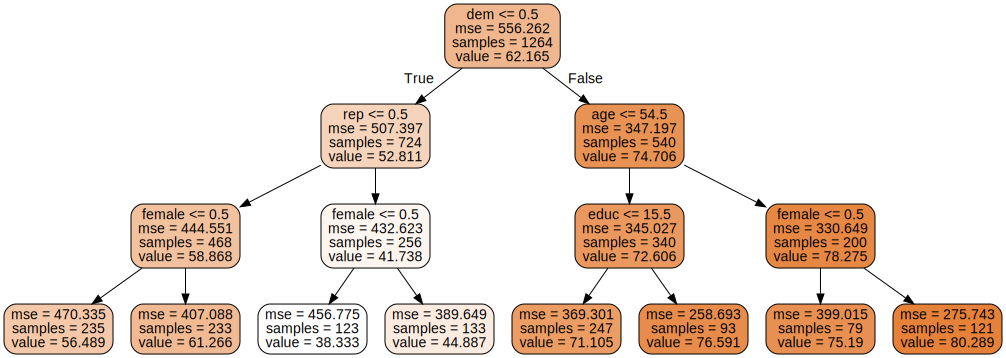

In [37]:
y = biden_df['biden'].values
X = biden_df[['female', 'age', 'educ', 'dem', 'rep']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)
bid_tree1 = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)
bid_tree1.fit(X_train, y_train)

bid_tree_viz1 = export_graphviz(
    bid_tree1,
    out_file=None,
    feature_names=biden_df.columns[1:],
    class_names=biden_df.biden,
    rounded=True,
    filled=True,
)

graph = graphviz.Source(bid_tree_viz1)
graph.render('biden_tree_viz')
graph

Using the recursive binary splitting to fit a decision tree to the training data, we can get the result above. The model firstly split the respondents by using 'dem' variable, which means it splits the respondents on whether the individual is a democrat or not. If the individual isn't a democrat, then the model split the respondents on whether he/she is a republican. Then the next split uses the gender variable- whether the individual is a female or not. From the root node, if the individual is a democrat, then the model split the data on whether the individual's age is no more than 54.5 or not. If his/her age is no more than 54.5, then the model chooses to use education variable to split the respondents and the threshold is 15.5 years of formal education completed by respondent. For the older group of respondents, the model chooses to use the gender (whether the individual is famale or not) to split the respondents. As we set the max depth is 3, we can then get the leaf nodes. Each node has a value, which indicates the average thermometer score of the group. Thus, when we use this model to predict, we can get the predicted thermometer score based on which node/group of respondents the test ones should be.

In [38]:
y_pred = bid_tree1.predict(X_test)
MSE1 = mean_squared_error(y_test, y_pred)
print('Test MSE=', MSE1)

Test MSE= 396.1937146321307


In [48]:
#####b#####
param_dist1 = {'max_depth': [3, 10],
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20)}

bid_tree2 = DecisionTreeRegressor()

random_search1 = RandomizedSearchCV(bid_tree2, 
                                    param_distributions=param_dist1,
                                    n_iter=100, 
                                    n_jobs=-1, 
                                    cv=5, 
                                    random_state=25,
                                    scoring='neg_mean_squared_error')
random_search1.fit(X, y)
print('Optimal tuning parameter values = ', random_search1.best_params_)
print('MSE of optimal results =', -random_search1.best_score_)

Optimal tuning parameter values =  {'max_depth': 3, 'min_samples_leaf': 17, 'min_samples_split': 14}
MSE of optimal results = 401.6903602232667


In [49]:
#####c#####
param_dist2 = {'n_estimators': [10, 200], 
               'max_depth': [3, 10],
               'min_samples_split': sp_randint(2, 20), 
               'min_samples_leaf': sp_randint(2, 20), 
               'max_features': sp_randint(1, 5)}
bid_tree3 = RandomForestRegressor(bootstrap=True,
                                  n_jobs=-1, 
                                  oob_score=True, 
                                  random_state=25)

random_search2 = RandomizedSearchCV(bid_tree3, 
                                    param_distributions=param_dist2,
                                    n_iter=100, 
                                    n_jobs=-1, 
                                    cv=5, 
                                    random_state=25,
                                    scoring='neg_mean_squared_error')
random_search2.fit(X, y)
print('Optimal tuning parameter values = ', random_search2.best_params_)
print('MSE of optimal results =', -random_search2.best_score_)

Optimal tuning parameter values =  {'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 17, 'min_samples_split': 13, 'n_estimators': 10}
MSE of optimal results = 397.0681090117028


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


### Problem 2

In [98]:
#####a#####
auto = pd.read_csv('Auto.csv')
auto = auto.dropna()
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [99]:
med = auto['mpg'].median()
auto['mpg_high'] = (auto['mpg'] >= med).astype(int)
auto['const'] = 1
auto['orgn_1'] = (auto['origin'] == 1).astype(int)
auto['orgn_2'] = (auto['origin'] == 2).astype(int)
auto = auto.drop(axis=1, columns=['name'])
auto = auto.drop(axis=0, index=auto[auto['horsepower'] =='?'].index)
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg_high,const,orgn_1,orgn_2
0,18.0,8,307.0,130,3504,12.0,70,1,0,1,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,1,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,1,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,1,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,1,1,1,0
393,44.0,4,97.0,52,2130,24.6,82,2,1,1,0,1
394,32.0,4,135.0,84,2295,11.6,82,1,1,1,1,0
395,28.0,4,120.0,79,2625,18.6,82,1,1,1,1,0


In [101]:
X = auto[['const', 'cylinders', 'displacement', 'horsepower', 
          'weight', 'acceleration', 'year', 'orgn_1', 'orgn_2']].values
y = auto['mpg_high'].values

kf = KFold(n_splits=4, shuffle=True, random_state=25)
kf.get_n_splits(X)
MSE_vec_kf = np.zeros(4)
err_vec_0 = np.zeros(4)
err_vec_1 = np.zeros(4)

k = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]   
    LogReg = LogisticRegression(solver='liblinear')
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)  
    MSE_vec_kf[k] = ((y_test - y_pred) ** 2).mean()
    err_vec_0[k] = sum((y_test != y_pred) * (y_test == 0)) / sum(y_test == 0)
    err_vec_1[k] = sum((y_test != y_pred) * (y_test == 1)) / sum(y_test == 1)
    k += 1
    
print('Average MSE across k=4:', MSE_vec_kf.mean())
print('Average error rate for mpg_high=0:', err_vec_0.mean())
print('Average error rate for mpg_high=1:', err_vec_1.mean())

Average MSE across k=4: 0.10204081632653061
Average error rate for mpg_high=0: 0.1193288810332874
Average error rate for mpg_high=1: 0.08404440302637545


In [105]:
#####b#####
param_dist3 = {'n_estimators': [10, 200], 
               'max_depth': [3, 8],
               'min_samples_split': sp_randint(2, 20), 
               'min_samples_leaf': sp_randint(2, 20),
               'max_features': sp_randint(1, 8)}
               
X = auto[['cylinders', 'displacement', 'horsepower', 
          'weight', 'acceleration', 'year', 'orgn_1', 'orgn_2']]
y = auto['mpg_high']
               
mpg_tree1 = RandomForestClassifier(bootstrap=True,
                                  n_jobs=-1, 
                                  oob_score=True, 
                                  random_state=25)

random_search3 = RandomizedSearchCV(mpg_tree1, 
                                    param_distributions=param_dist3,
                                    n_iter=100, 
                                    n_jobs=-1, 
                                    cv=4, 
                                    random_state=25,
                                    scoring='neg_mean_squared_error')
random_search3.fit(X, y)
print('Optimal tuning parameter values = ', random_search3.best_params_)
print('MSE of optimal results =', -random_search3.best_score_)

Optimal tuning parameter values =  {'max_depth': 8, 'max_features': 3, 'min_samples_leaf': 15, 'min_samples_split': 2, 'n_estimators': 10}
MSE of optimal results = 0.08928571428571429


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [110]:
#####c#####
param_dist4 = {'C': sp_uniform(loc=0.2, scale=4.0), 
               'gamma': ['scale', 'auto'],
               'shrinking': [True, False]}

mpg_tree2 = SVC(kernel='rbf')

random_search4 = RandomizedSearchCV(mpg_tree2, 
                                    param_distributions=param_dist4,
                                    n_iter=100, 
                                    n_jobs=-1, 
                                    cv=4, 
                                    random_state=25,
                                    scoring='neg_mean_squared_error')
random_search4.fit(X, y)
print('Optimal tuning parameter values = ', random_search4.best_params_)
print('MSE of optimal results =', -random_search4.best_score_)

Optimal tuning parameter values =  {'C': 1.8094629152568114, 'gamma': 'scale', 'shrinking': False}
MSE of optimal results = 0.11989795918367346


In [112]:
print('Logit MSE:', MSE_vec_kf.mean())
print('Random Forest MSE:', -random_search3.best_score_)
print('SVM MSE:', -random_search4.best_score_)

Logit MSE: 0.10204081632653061
Random Forest MSE: 0.08928571428571429
SVM MSE: 0.11989795918367346


The random forest model is the best predictor of mpg_high, because it has the lowest MSE among the three models.